## Number of books issued in single transaction
In our library, as per rules, maximum of two books can be issued to BTech students. The rule is different for MTech students and staff. If a BTech student want to take more books, s/he has to return already issued books. Students can take two books together or separately.  

In this analysis, we are trying to understand if students are taking books together of one at a time. To do that, we first compute number of books issued to each student in each day, then we plot the result to understand the pattern 

- Input: `bkIssue_libUser_bkDetails.csv`


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("src/bkIssue_libUser_bkDetails.csv")
# df

In [3]:
# drop unnecessary columns 
df.drop(["sex", "sl_no", "checked_in(Y/N)", "book_issued(Y/N)"], inplace=True, axis=1)

In [4]:
# Convert date format
df['issue_date'] = pd.to_datetime(df['issue_date'], dayfirst=True)
# df.shape
# df

In [5]:
# Group by issue_date then group by id. Per day book issues to each user
df1 = df.groupby(['issue_date', 'id'],as_index=False)['title'].count()

In [6]:
x = df1['title'].unique().tolist()

In [7]:
y = []
for i in x:
  y.append(df1[df1['title'] == i].shape[0])

In [8]:
# Create a dataframe for storing result
res = pd.DataFrame()
res["Books_issued_in_single_transaction"] = x
res["Frequency"] = y

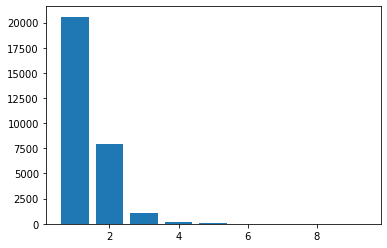

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.bar(x,y)
plt.show()

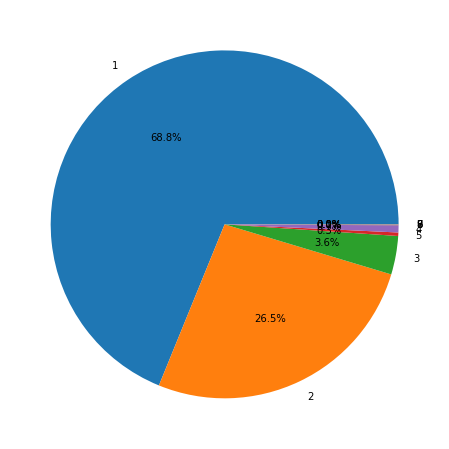

In [10]:
fig = plt.figure(figsize=(10,8))
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.show()


Table

In [11]:
# Displaying the result
sum_freq = sum(res["Frequency"]) # 29901

# calculate percentage from each row and create a column
res["Percentage"] = res.apply(lambda row: (row['Frequency']/sum_freq) * 100, axis = 1) 
res

,Books_issued_in_single_transaction,Frequency,Percentage
0,1,20582,68.833818
1,2,7930,26.520852
2,3,1070,3.578476
3,5,96,0.321059
4,4,197,0.658841
5,6,19,0.063543
6,7,4,0.013377
7,8,1,0.003344
8,9,2,0.006689


From the above analysis it is found that,
- Mostly (69%) it is just one book that is issued to user. That is, users generally prefer to take only one book at a time.  
- Among 29901 transactions, in 7930 transactions 2 books were issued. This is more than 25% of total transactions.
- This analysis include, undergraduate students, post graduate students and staff. Considering the large number of undergraduate students, percentage calculation could be less helpful. 